In [1]:
# pip install pandas scikit-learn matplotlib

In [1]:
from pathlib import Path
import os

import utils as u

In [2]:
notebook_path = Path(os.path.abspath("."))
data_path = notebook_path.parent / "docs" / "data"

# EVALUATION

## NHL

In [4]:
prediction_files, results_files = u.get_prediction_results_filepaths(league="nhl", root=data_path)

df = u.make_dataframe(pred_filepaths=prediction_files, res_filepaths=results_files, total_line=6.5, hcp_line=1.5)
df.head(2)

,match_id,start_time_utc,home_team,away_team,ft_home_prob,ou_prob,hcp_prob,home_team_score,away_team_score,ft_home_won,ou_won,hcp_won
0,2025020338,2025-11-23T00:00:00,Florida Panthers,Edmonton Oilers,0.5131,0.4313,0.7395,3,6,False,True,False
1,2025020158,2025-10-29T00:15:00,St. Louis Blues,Detroit Red Wings,0.5611,0.4040,0.7829,2,5,False,True,False


In [3]:
import numpy as np


# df.assign(
#     full_time_result=lambda x: np.where(x["home_team_score"]>x["away_team_score"], "home", "away")    
# )[["match_id", "start_time_utc", "ft_home_prob", "full_time_result"]].rename(
#     columns={
#         "ft_home_prob": "player_full_time_result_home_pred"
#     }
# ).to_parquet(
#     "nhl_dashboard_preds.parquet", index=False, engine="pyarrow"
# )

=== Evaluation Summary ===
                       n  prevalence  brier  logloss    auc  acc@0.5
metric                                                              
FT Home Win          376      0.5293 0.2556   0.7047 0.5084   0.5106
Totals (Over/Under)  376      0.4814 0.2512   0.6955 0.4981   0.5266
Asian Handicap       376      0.7473 0.1945   0.5802 0.5041   0.7447


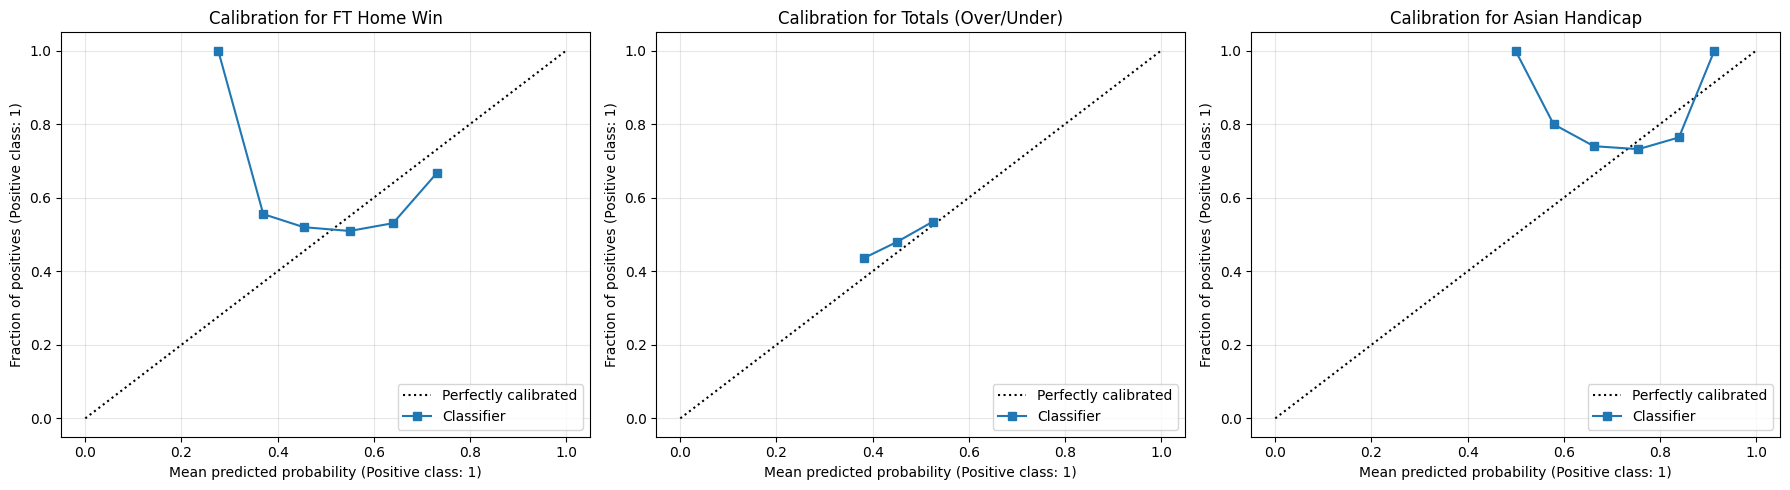

In [5]:
# Evaluate everything
_ = u.evaluate_calibration(df=df, n_bins=10)

=== Evaluation Summary ===
                       n  prevalence  brier  logloss    auc  acc@0.5
metric                                                              
FT Home Win          231      0.5325 0.2512   0.6951 0.5334   0.5108
Totals (Over/Under)  231      0.4892 0.2514   0.6959 0.4985   0.5065
Asian Handicap       231      0.7489 0.1961   0.5827 0.4840   0.7446


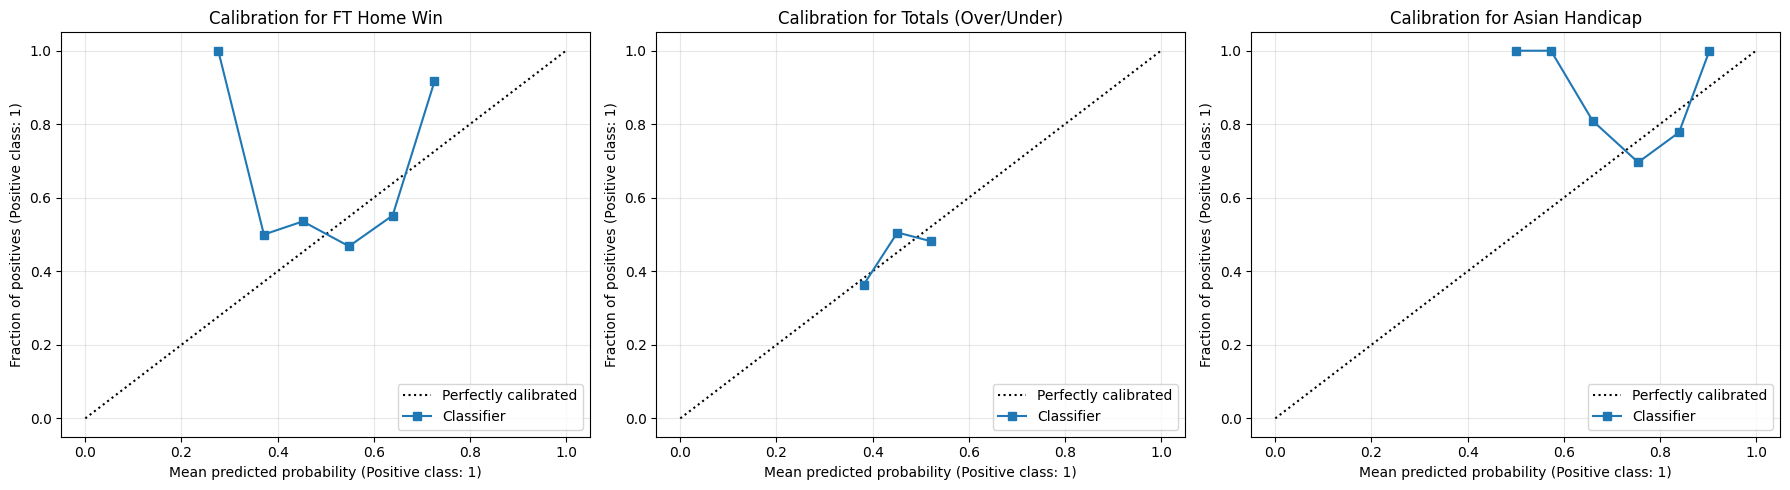

In [9]:
# Evaluate matches only after major bugfix
after_bug_df = df[df["start_time_utc"].between("2025-10-29 15:00:00", "2025-12-01")].copy()
_ = u.evaluate_calibration(df=after_bug_df, n_bins=10)

## NBA

In [4]:
prediction_files, results_files = u.get_prediction_results_filepaths(league="nba", root=data_path)

df = u.make_dataframe(pred_filepaths=prediction_files, res_filepaths=results_files, total_line=225.5, hcp_line=8.5)
df.head(2)

,match_id,start_time_utc,home_team,away_team,ft_home_prob,ou_prob,hcp_prob,home_team_score,away_team_score,ft_home_won,ou_won,hcp_won
0,0022500264,2025-11-21T00:00:00,Orlando Magic,Los Angeles Clippers,0.3465,0.3498,0.5706,129,101,True,True,True
1,0022500067,2025-11-27T03:00:00,Portland Trailblazers,San Antonio Spurs,0.5471,0.7181,0.7488,102,115,False,False,False


In [11]:
df.sort_values("start_time_utc")

,match_id,start_time_utc,home_team,away_team,ft_home_prob,ou_prob,hcp_prob,home_team_score,away_team_score,ft_home_won,ou_won,hcp_won
95,0022500243,2025-11-18T00:00:00,Philadelphia 76ers,Los Angeles Clippers,0.4593,0.5315,0.6771,110,108,True,False,True
75,0022500242,2025-11-18T00:00:00,Detroit Pistons,Indiana Pacers,0.7957,0.6925,0.9161,127,112,True,True,True
44,0022500241,2025-11-18T00:00:00,Cleveland Cavaliers,Milwaukee Bucks,0.6347,0.7651,0.8137,118,106,True,False,True
10,0022500244,2025-11-18T00:30:00,Miami Heat,New York Knicks,0.6021,0.4706,0.7951,115,113,True,True,True
39,0022500245,2025-11-18T00:30:00,Toronto Raptors,Charlotte Hornets,0.7464,0.7325,0.8874,110,108,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
43,0022500312,2025-12-02T00:30:00,Brooklyn Nets,Charlotte Hornets,0.4315,0.8716,0.6434,116,103,True,False,True
27,0022500313,2025-12-02T00:30:00,Miami Heat,Los Angeles Clippers,0.3105,0.8972,0.5170,140,123,True,True,True
17,0022500316,2025-12-02T02:00:00,Utah Jazz,Houston Rockets,0.2803,0.7700,0.4864,133,125,True,True,True
34,0022500315,2025-12-02T02:00:00,Denver Nuggets,Dallas Mavericks,0.6539,0.8921,0.8249,121,131,False,True,False


=== Evaluation Summary ===
                      n  prevalence  brier  logloss    auc  acc@0.5
metric                                                             
FT Home Win          97      0.5361 0.2122   0.6125 0.7222   0.6289
Totals (Over/Under)  97      0.5979 0.2588   0.7252 0.5511   0.5876
Asian Handicap       97      0.7629 0.1452   0.4435 0.8038   0.7938


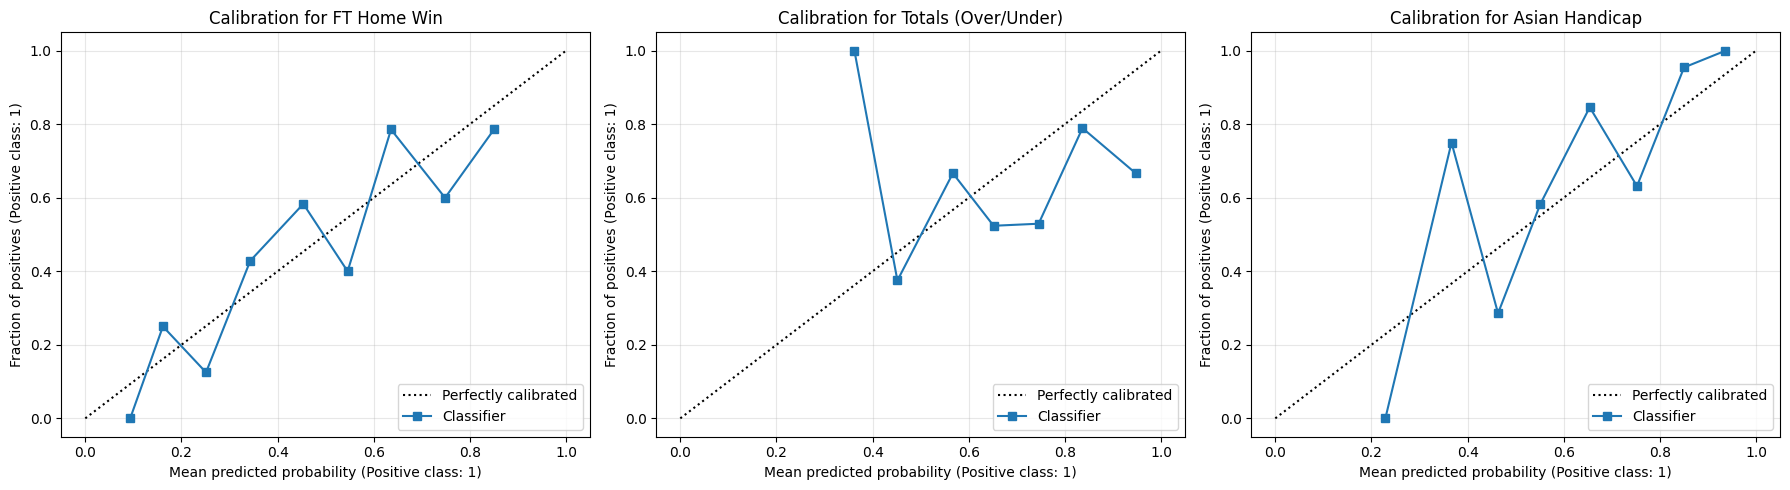

In [10]:
_ = u.evaluate_calibration(df=df[df["start_time_utc"].between("2025-10-29 15:00:00", "2025-12-01")], n_bins=10)

In [ ]:
# df.assign(
#     full_time_result=lambda x: np.where(x["home_team_score"]>x["away_team_score"], "home", "away")    
# )[["match_id", "start_time_utc", "ft_home_prob", "full_time_result"]].rename(
#     columns={
#         "ft_home_prob": "player_full_time_result_home_pred"
#     }
# ).to_parquet(
#     "nba_dashboard_preds.parquet", index=False, engine="pyarrow"
# )